# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).
<center><h3>Author: Siddhant Tandon</h3></center>

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.2699999939650297


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Preliminaries

In [6]:
# libraries
import sys
sys.path.append("code")

from collections import deque
from unityagents import UnityEnvironment
import numpy as np
import random as random
import torch
from DDPGAgent import DDPGAgent

import matplotlib.pyplot as plt

In [7]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [8]:
SEED = 0

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED);

In [9]:
agents = [DDPGAgent(state_size, action_size, random_seed=SEED)]
scores_episode = []

### DDPG 

In [10]:
def ddpg(n_episodes=300, max_t=1000):
    scores_window = deque(maxlen=100)
    scores = np.zeros(num_agents)
        
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
            
        for t in range(max_t):
            actions = [agents[i].act(states[i]) for i in range(num_agents)]
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            for i in range(num_agents):
                agents[i].step(t,states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)
        scores_episode.append(score)
        
        torch.save(agents[0].actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agents[0].critic_local.state_dict(), 'checkpoint_critic.pth')
        
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}\t\t\t'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 30.0 and len(scores_window) >= 100:
            print('\nEnvironment solved!')
            break
            
    return scores_episode

### Training

In [11]:
_ = ddpg(2000);

Episode 1	Score: 0.07	Average Score: 0.07			
Episode 2	Score: 0.22	Average Score: 0.14			
Episode 3	Score: 0.59	Average Score: 0.29			
Episode 4	Score: 0.67	Average Score: 0.39			
Episode 5	Score: 0.48	Average Score: 0.41			
Episode 6	Score: 0.99	Average Score: 0.50			
Episode 7	Score: 0.41	Average Score: 0.49			
Episode 8	Score: 0.87	Average Score: 0.54			
Episode 9	Score: 0.09	Average Score: 0.49			
Episode 10	Score: 0.55	Average Score: 0.49			
Episode 11	Score: 0.10	Average Score: 0.46			
Episode 12	Score: 0.43	Average Score: 0.46			
Episode 13	Score: 0.62	Average Score: 0.47			
Episode 14	Score: 1.08	Average Score: 0.51			
Episode 15	Score: 1.42	Average Score: 0.57			
Episode 16	Score: 0.76	Average Score: 0.58			
Episode 17	Score: 0.79	Average Score: 0.60			
Episode 18	Score: 0.56	Average Score: 0.59			
Episode 19	Score: 0.56	Average Score: 0.59			
Episode 20	Score: 0.68	Average Score: 0.60			
Episode 21	Score: 1.04	Average Score: 0.62			
Episode 22	Score: 1.01	Average Score: 0.64	

Episode 176	Score: 8.97	Average Score: 6.09			
Episode 177	Score: 8.42	Average Score: 6.14			
Episode 178	Score: 5.22	Average Score: 6.17			
Episode 179	Score: 3.53	Average Score: 6.16			
Episode 180	Score: 7.95	Average Score: 6.23			
Episode 181	Score: 9.21	Average Score: 6.28			
Episode 182	Score: 7.68	Average Score: 6.32			
Episode 183	Score: 12.97	Average Score: 6.41			
Episode 184	Score: 11.87	Average Score: 6.52			
Episode 185	Score: 9.76	Average Score: 6.59			
Episode 186	Score: 13.34	Average Score: 6.67			
Episode 187	Score: 9.23	Average Score: 6.74			
Episode 188	Score: 9.60	Average Score: 6.80			
Episode 189	Score: 8.47	Average Score: 6.86			
Episode 190	Score: 6.88	Average Score: 6.86			
Episode 191	Score: 2.49	Average Score: 6.87			
Episode 192	Score: 10.01	Average Score: 6.95			
Episode 193	Score: 8.12	Average Score: 7.01			
Episode 194	Score: 7.74	Average Score: 7.05			
Episode 195	Score: 11.17	Average Score: 7.12			
Episode 196	Score: 15.52	Average Score: 7.23			
Episode

Episode 345	Score: 17.03	Average Score: 13.78			
Episode 346	Score: 13.06	Average Score: 13.81			
Episode 347	Score: 17.29	Average Score: 13.86			
Episode 348	Score: 25.27	Average Score: 14.00			
Episode 349	Score: 14.29	Average Score: 13.96			
Episode 350	Score: 20.60	Average Score: 14.05			
Episode 351	Score: 20.19	Average Score: 14.12			
Episode 352	Score: 22.32	Average Score: 14.21			
Episode 353	Score: 12.05	Average Score: 14.21			
Episode 354	Score: 12.11	Average Score: 14.28			
Episode 355	Score: 21.91	Average Score: 14.42			
Episode 356	Score: 18.32	Average Score: 14.47			
Episode 357	Score: 20.39	Average Score: 14.56			
Episode 358	Score: 11.93	Average Score: 14.56			
Episode 359	Score: 16.48	Average Score: 14.62			
Episode 360	Score: 14.70	Average Score: 14.56			
Episode 361	Score: 10.62	Average Score: 14.55			
Episode 362	Score: 22.21	Average Score: 14.69			
Episode 363	Score: 20.87	Average Score: 14.85			
Episode 364	Score: 19.32	Average Score: 14.93			
Episode 365	Score: 2

Episode 510	Score: 22.88	Average Score: 22.13			
Episode 511	Score: 19.14	Average Score: 22.09			
Episode 512	Score: 19.94	Average Score: 22.10			
Episode 513	Score: 25.24	Average Score: 22.12			
Episode 514	Score: 25.36	Average Score: 22.16			
Episode 515	Score: 19.31	Average Score: 22.18			
Episode 516	Score: 19.27	Average Score: 22.10			
Episode 517	Score: 22.15	Average Score: 21.96			
Episode 518	Score: 21.45	Average Score: 21.94			
Episode 519	Score: 18.83	Average Score: 21.74			
Episode 520	Score: 21.92	Average Score: 21.71			
Episode 521	Score: 25.57	Average Score: 21.79			
Episode 522	Score: 21.36	Average Score: 21.78			
Episode 523	Score: 20.21	Average Score: 21.85			
Episode 524	Score: 17.51	Average Score: 21.87			
Episode 525	Score: 20.69	Average Score: 21.84			
Episode 526	Score: 21.57	Average Score: 21.86			
Episode 527	Score: 24.22	Average Score: 21.93			
Episode 528	Score: 25.23	Average Score: 21.98			
Episode 529	Score: 20.93	Average Score: 22.00			
Episode 530	Score: 2

Episode 676	Score: 32.55	Average Score: 28.53			
Episode 677	Score: 29.07	Average Score: 28.55			
Episode 678	Score: 33.94	Average Score: 28.62			
Episode 679	Score: 32.27	Average Score: 28.67			
Episode 680	Score: 37.28	Average Score: 28.77			
Episode 681	Score: 33.30	Average Score: 28.85			
Episode 682	Score: 27.34	Average Score: 28.94			
Episode 683	Score: 16.52	Average Score: 28.81			
Episode 684	Score: 18.78	Average Score: 28.71			
Episode 685	Score: 21.55	Average Score: 28.62			
Episode 686	Score: 30.50	Average Score: 28.64			
Episode 687	Score: 30.77	Average Score: 28.64			
Episode 688	Score: 34.16	Average Score: 28.76			
Episode 689	Score: 28.68	Average Score: 28.78			
Episode 690	Score: 31.89	Average Score: 28.87			
Episode 691	Score: 32.14	Average Score: 28.83			
Episode 692	Score: 36.14	Average Score: 28.99			
Episode 693	Score: 31.34	Average Score: 29.11			
Episode 694	Score: 32.42	Average Score: 29.18			
Episode 695	Score: 33.24	Average Score: 29.25			
Episode 696	Score: 3

### Results

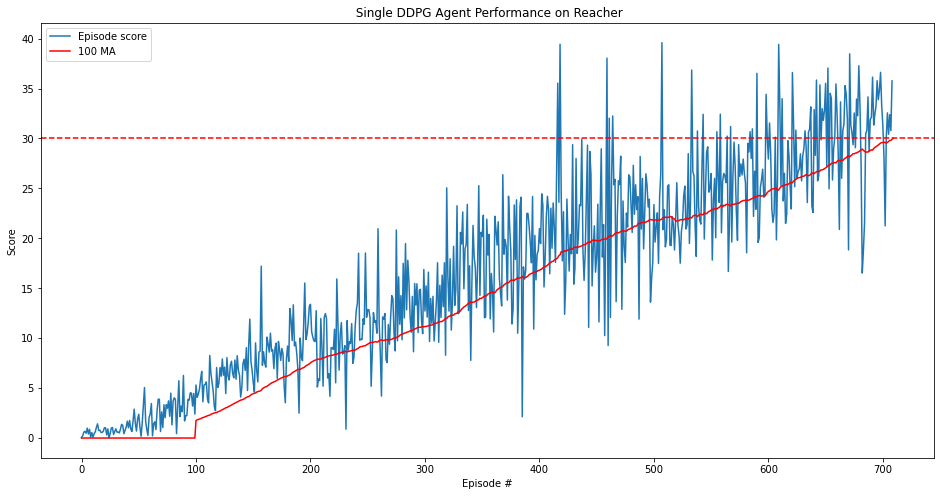

In [16]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

ma = 100
avg = moving_average(scores_episode, ma)
avg = np.concatenate((np.zeros(ma), avg))

# plot the scores
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_episode)), scores_episode, label='Episode score')
plt.plot(np.arange(len(avg)), avg, c='r', label='{} MA'.format(ma))
plt.axhline(y=30, color='r', linestyle='dashed')

plt.legend()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' Single DDPG Agent Performance on Reacher')
plt.show()
fig.savefig('continuous_control_plot.jpg')

When finished, you can close the environment.

In [13]:
env.close()

<center><h2>--End of Code--</h2><c/center>